In [1]:
import numpy as np
import pandas as pd
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from random import sample

voxels = np.load('../data/voxels32/subset9Xpositive.npy')
malignancy = np.load('../data/voxels32/subset9IXpositive.npy')
df = pd.read_csv('../data/CSVFILES/annotations_enhanced.csv')

In [2]:
def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

def hist(ARRAY):
    plt.hist(ARRAY.flatten(), bins=80, color='c')
    plt.ylabel("Frequency")
    plt.show()

def array_stats(ARRAY):
    print ('Shape\t',ARRAY.shape)
    print ('Max\t',np.max(ARRAY))
    print ('Min\t',np.min(ARRAY))
    print ('Avg\t',np.mean(ARRAY))

Distribution of nodules sampled from 1 to 1172


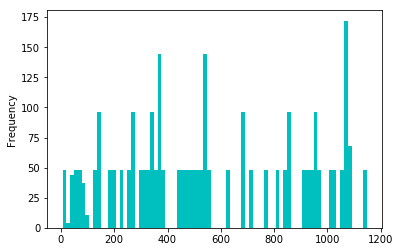

In [3]:
print ('Distribution of nodules sampled from 1 to 1172')
hist(malignancy)

Malignancy 2.66666666667


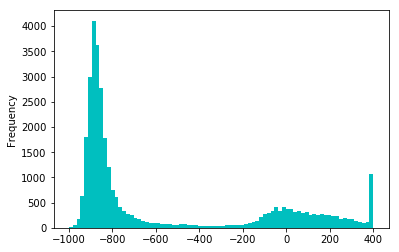

Shape	 (32, 32, 32)
Max	 400
Min	 -1000
Avg	 -575.736297607


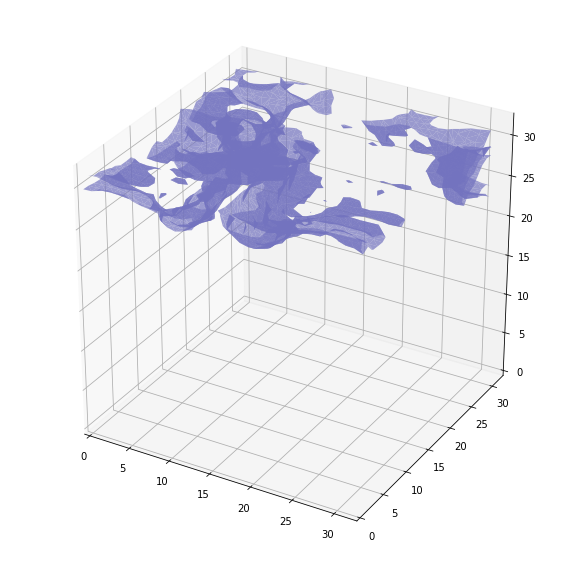

Malignancy 4.25


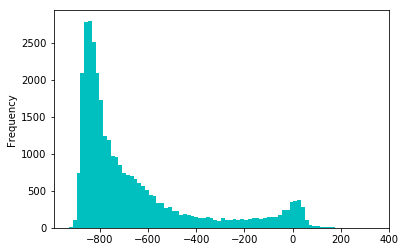

Shape	 (32, 32, 32)
Max	 335
Min	 -929
Avg	 -659.191741943


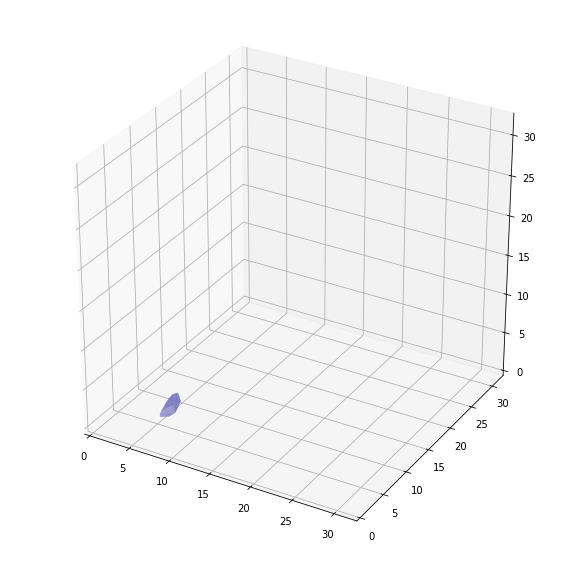

Malignancy 2.0


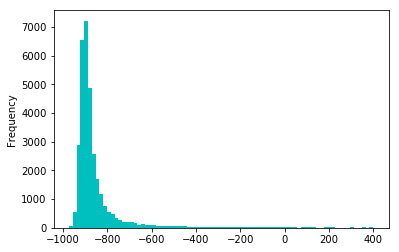

Shape	 (32, 32, 32)
Max	 400
Min	 -974
Avg	 -848.268493652


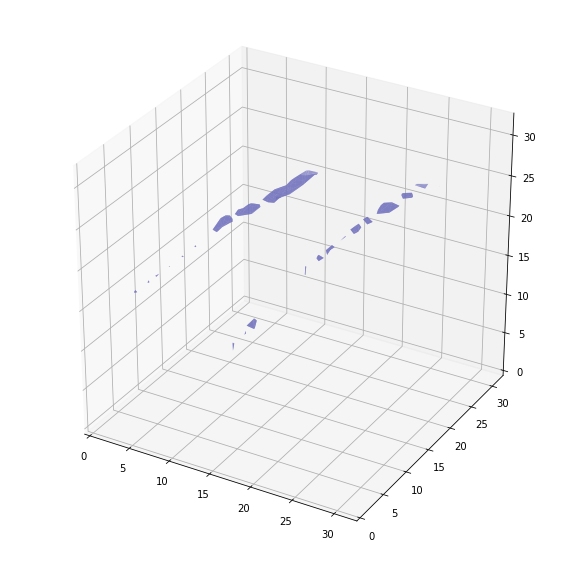

Malignancy 2.66666666667


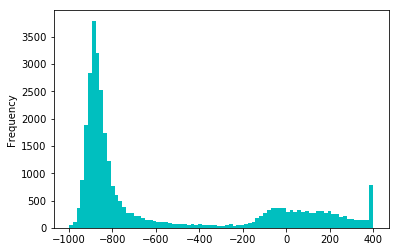

Shape	 (32, 32, 32)
Max	 400
Min	 -1000
Avg	 -574.434783936


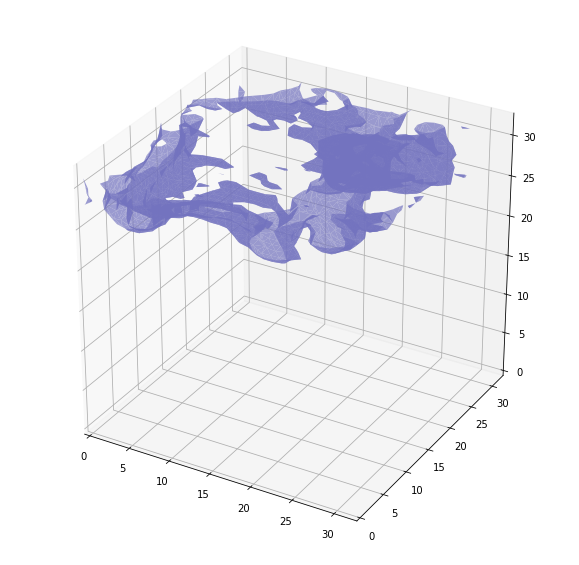

Malignancy 2.66666666667


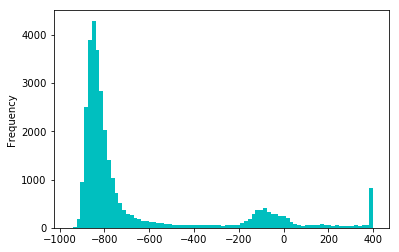

Shape	 (32, 32, 32)
Max	 400
Min	 -958
Avg	 -657.084869385


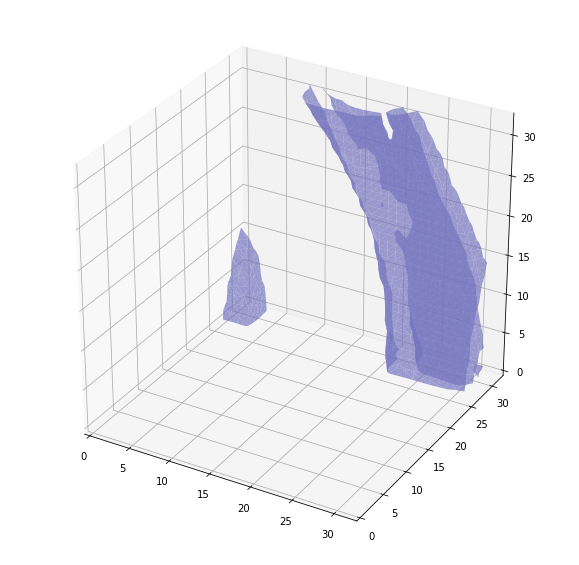

Malignancy 2.75


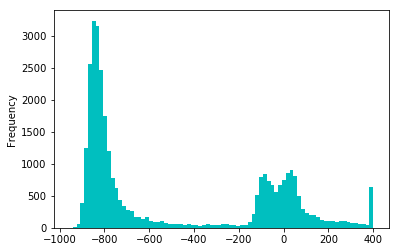

Shape	 (32, 32, 32)
Max	 400
Min	 -958
Avg	 -489.040252686


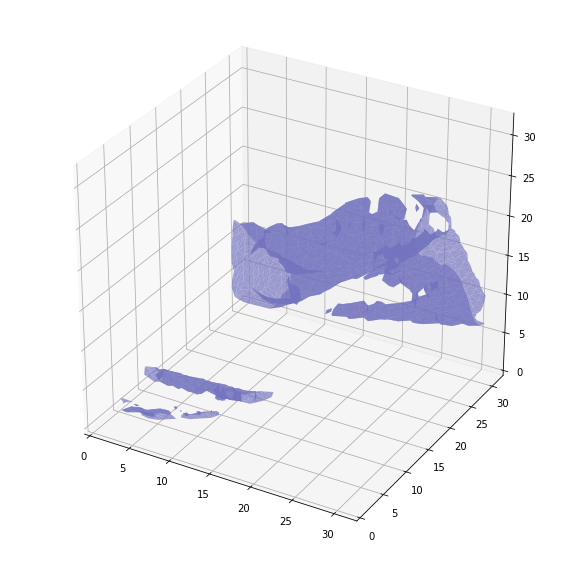

Malignancy 3.0


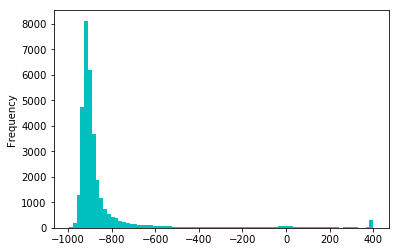

Shape	 (32, 32, 32)
Max	 400
Min	 -996
Avg	 -844.398773193


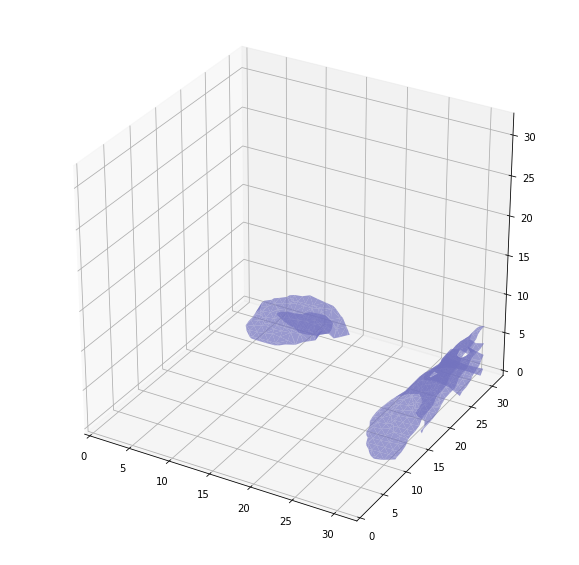

Malignancy 2.75


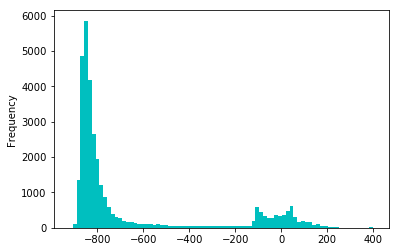

Shape	 (32, 32, 32)
Max	 400
Min	 -924
Avg	 -659.899139404


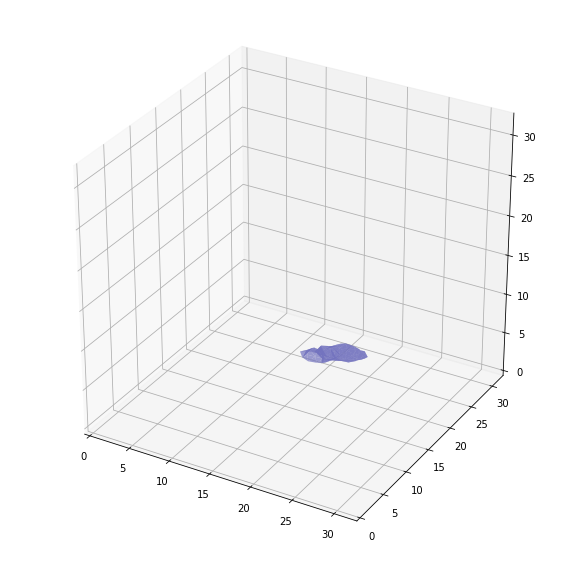

Malignancy 2.0


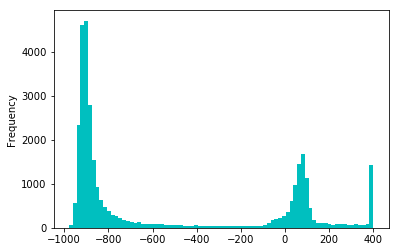

Shape	 (32, 32, 32)
Max	 400
Min	 -979
Avg	 -536.973754883


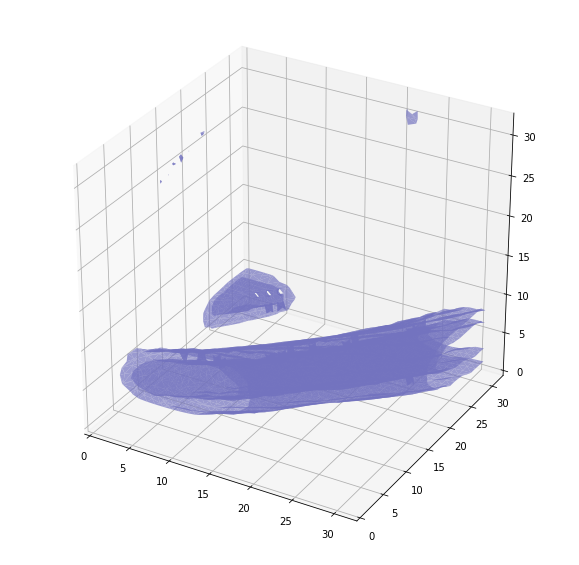

Malignancy 3.0


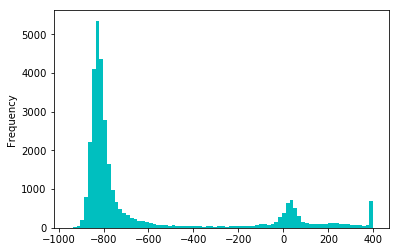

Shape	 (32, 32, 32)
Max	 400
Min	 -954
Avg	 -621.807342529


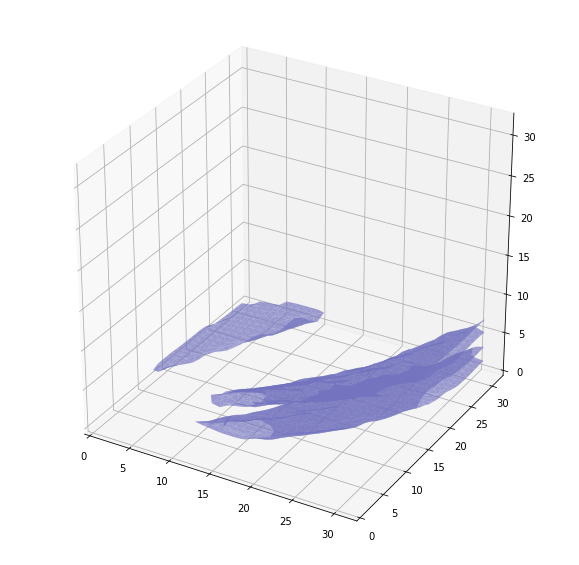

In [4]:
for i in sample(range(0,voxels.shape[0]), 10):
    print ('Malignancy',df.iloc[malignancy[i]].malignancy)
    hist(voxels[i])
    array_stats(voxels[i])
    plot_3d(voxels[i], np.max(voxels[i])-100)